In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno


In [24]:
df=pd.read_csv("UpdatedStudentsPerformance.csv")

In [25]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [26]:
#performing all basic operations
#shape,size,min ,max,describe,std,quantile,dtypes etc
df.shape

(1000, 8)

In [27]:
df.size  #rows*col=size

8000

In [28]:
df.describe()

,math score,reading score,writing score
count,990.000000,985.000000,989.000000
mean,66.208081,69.261929,68.142568
std,15.103724,14.634171,15.199780
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [29]:
df.min()

gender                                          f
race/ethnicity                            group A
parental level of education    associate's degree
lunch                                free/reduced
test preparation course                 completed
math score                                    0.0
reading score                                17.0
writing score                                10.0
dtype: object

In [30]:
df.max()

gender                                     male
race/ethnicity                          group E
parental level of education    some high school
lunch                                  standard
test preparation course                    none
math score                                100.0
reading score                             100.0
writing score                             100.0
dtype: object

In [31]:
df.std()

/tmp/ipykernel_12977/3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


math score       15.103724
reading score    14.634171
writing score    15.199780
dtype: float64

In [32]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [33]:
#checking for missing data
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                  15
writing score                  11
dtype: int64

<AxesSubplot: >

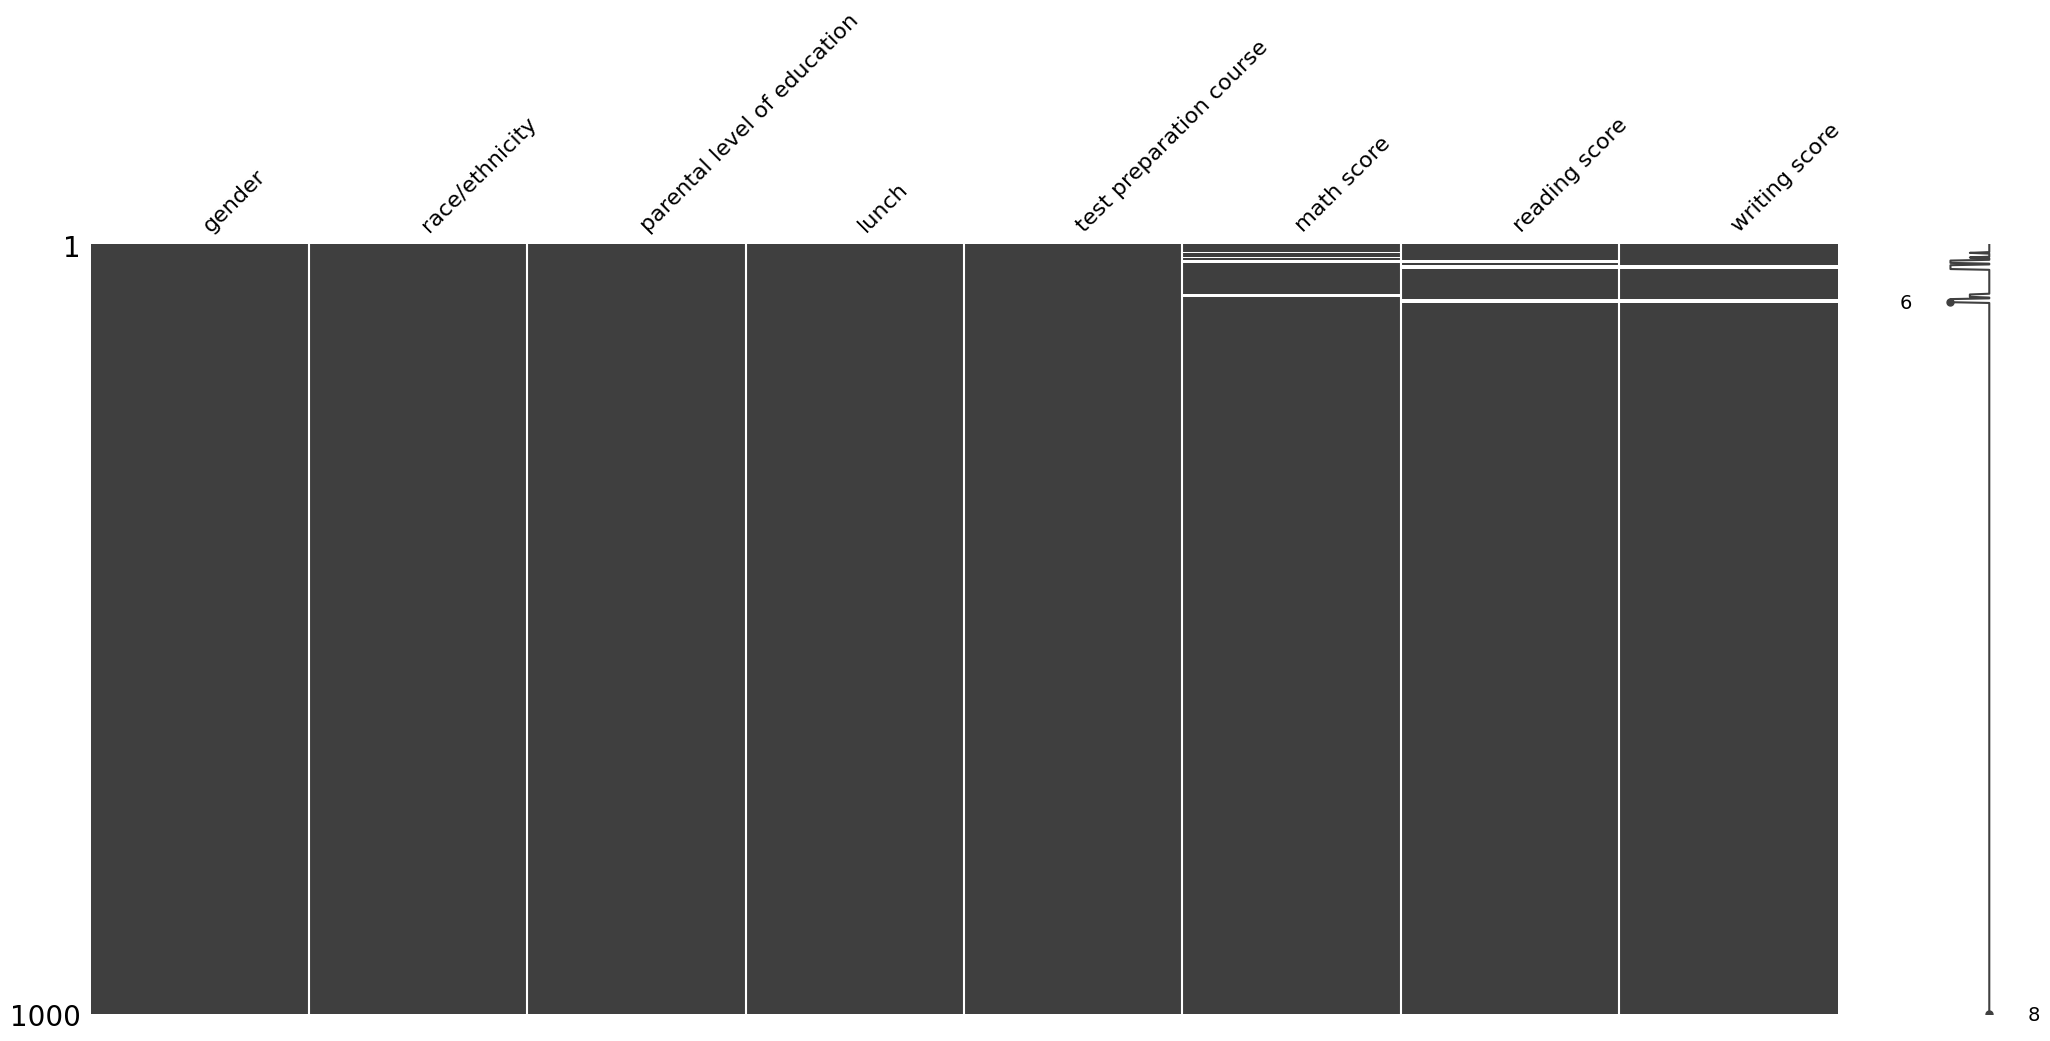

In [34]:
msno.matrix(df)

In [13]:
#filling the missing data
df=df.fillna(df.mean())

/tmp/ipykernel_12977/959476727.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [14]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot: >

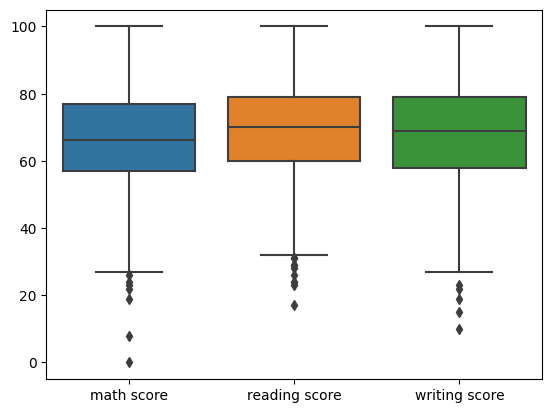

In [16]:
sns.boxplot(df)

In [35]:
dfnew=pd.concat([df['math score'],df['reading score'],df['writing score']],axis=1)


In [36]:
dfnew

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0
...,...,...,...
995,88.0,99.0,95.0
996,62.0,55.0,55.0
997,59.0,71.0,65.0
998,68.0,78.0,77.0


In [37]:
#method used to remove outliers 
#IQR , Zscore etc
#We are using IQR Inter Quantile Range
Q1=dfnew.quantile(0.25) #25 percent of value
Q3=dfnew.quantile(0.75) #75 percent of value
IQR=Q3-Q1
print(IQR)

math score       20.0
reading score    21.0
writing score    21.0
dtype: float64


In [38]:
low=Q1-1.5*IQR
high=Q3+1.5*IQR
print(low,high)

math score       27.0
reading score    27.5
writing score    26.5
dtype: float64 math score       107.0
reading score    111.5
writing score    110.5
dtype: float64


In [39]:
newdf=dfnew[~((dfnew<low)|(dfnew>high)).any(axis=1)]
newdf

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0
...,...,...,...
995,88.0,99.0,95.0
996,62.0,55.0,55.0
997,59.0,71.0,65.0
998,68.0,78.0,77.0


In [40]:
print(dfnew.shape)
print(newdf.shape)

(1000, 3)
(990, 3)


<AxesSubplot: >

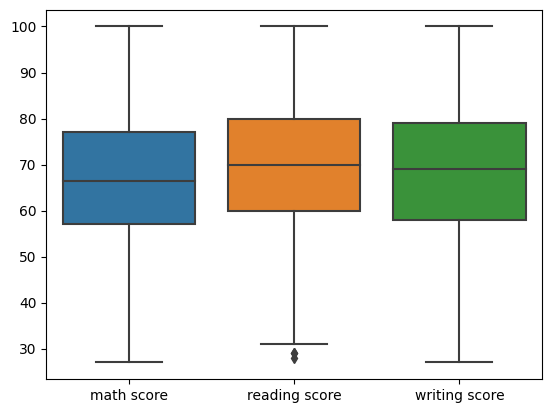

In [41]:
#again checking for outiers
sns.boxplot(newdf)

In [43]:
#Normalize it using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
newdf=scaler.fit_transform(newdf)

In [44]:
newdf

array([[0.61643836, 0.61111111, 0.64383562],
       [0.57534247, 0.86111111, 0.83561644],
       [0.8630137 , 0.93055556, 0.90410959],
       ...,
       [0.43835616, 0.59722222, 0.52054795],
       [0.56164384, 0.69444444, 0.68493151],
       [0.68493151, 0.80555556, 0.80821918]])

In [45]:
newdf=pd.DataFrame(newdf,columns=['math','reading','writing'])

In [46]:
newdf

,math,reading,writing
0,0.616438,0.611111,0.643836
1,0.575342,0.861111,0.835616
2,0.863014,0.930556,0.904110
3,0.273973,0.402778,0.232877
4,0.671233,0.694444,0.657534
...,...,...,...
985,0.835616,0.986111,0.931507
986,0.479452,0.375000,0.383562
987,0.438356,0.597222,0.520548
988,0.561644,0.694444,0.684932


<AxesSubplot: ylabel='Count'>

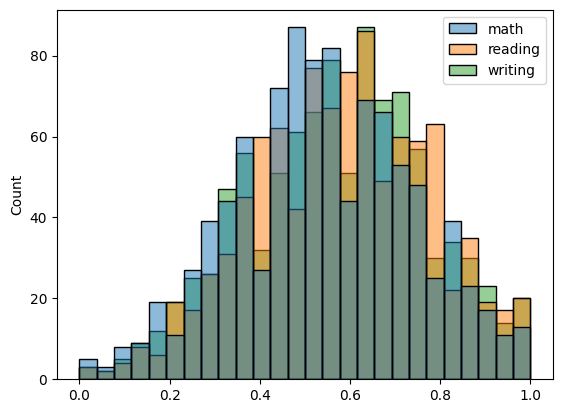

In [47]:
sns.histplot(newdf)

<AxesSubplot: >

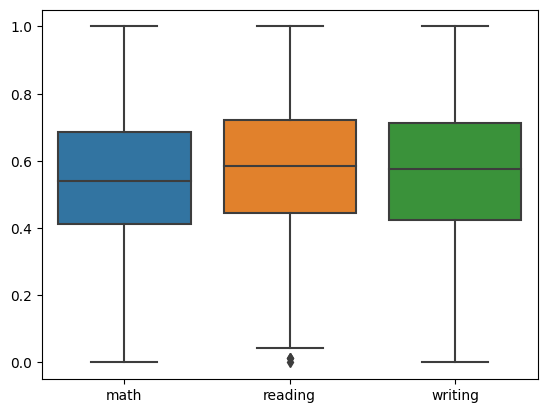

In [49]:
sns.boxplot(newdf)

<AxesSubplot: >

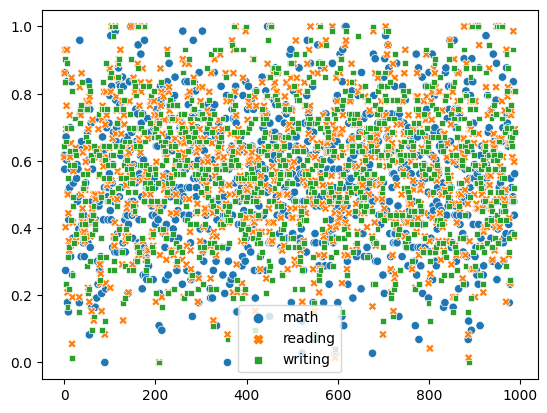

In [50]:
sns.scatterplot(newdf)

<AxesSubplot: ylabel='count'>

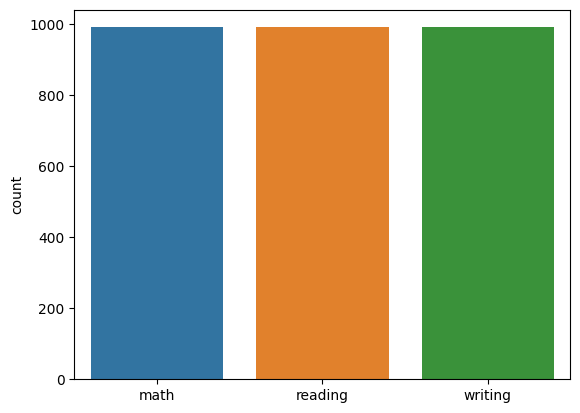

In [51]:
sns.countplot(newdf)